In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
char = ['a', 'b', 'c', 'd', 'e', 'f',
        'g', 'h', 'i', 'j', 'k', 'l',
        'm', 'n', 'o', 'p', 'q', 'r',
        's', 't', 'u', 'v', 'w', 'x',
        'y', 'z', '\n', '\0', ' '
       ]

char_to_id = {}
for i in range(len(char)):
    char_to_id[char[i]] = i

id_to_char = {}
for i in range(len(char)):
    id_to_char[i] = char[i]


def read_lines(filename):
    with open('./dataset/' + filename) as file:
        words = file.readlines()
        words = [i.rstrip('\n') + '\0' for i in words]
        return words

def string_to_id_list(s):
    return [char_to_id[i] for i in s.lower()]

def id_list_to_string(l):
    return ''.join([id_to_char[i] for i in l])

def pad_strings(lines):
    return [line.ljust(30, '\0') for line in lines]

In [4]:
decoded_lines = pad_strings(read_lines('dino.txt'))
encoded_lines = [string_to_id_list(i) for i in decoded_lines]

In [5]:
nchars = len(char)

In [6]:
x_train = []
y_train = []

for line in encoded_lines:
    
    buf_x = []
    buf_y = []
    
    for t in range(29):
        buf_x += [tf.keras.utils.to_categorical(line[t], nchars)]
        buf_y += [tf.keras.utils.to_categorical(line[t + 1], nchars)]
    
    buf_x += [tf.keras.utils.to_categorical(line[29], nchars)]
    buf_y += [tf.keras.utils.to_categorical(27, nchars)]
    
    x_train += [np.array(buf_x).astype('float32').reshape(len(buf_x), nchars)]
    y_train += [np.array(buf_y).astype('float32').reshape(len(buf_y), nchars)]

In [7]:
# print(y_train[0].shape)

x_train = np.array(x_train).reshape(len(x_train), 30, nchars)
y_train = np.array(y_train).reshape(len(y_train), 30, nchars)

print(x_train.shape)
print(y_train.shape)

(1536, 30, 29)
(1536, 30, 29)


In [8]:
class RNNSimpleModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        self.L1 = tf.keras.layers.SimpleRNN(50, return_sequences=True)
        self.L2 = tf.keras.layers.Dense(nchars, activation='softmax')
        
    def call(self, inputs):
        self.x = self.L1(inputs)
        self.x = self.L2(self.x)
        return self.x

In [9]:
model = RNNSimpleModel()

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=800, verbose=False)

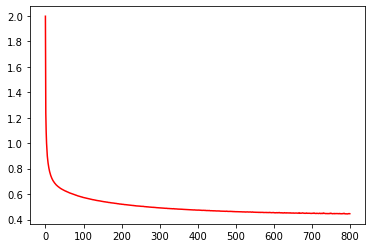

In [12]:
plt.plot(hist.history['loss'], c='r')
plt.show()

In [13]:
print('Accuracy:', 100 * model.evaluate(x_train, y_train, verbose=False)[1], '%')

Accuracy: 86.56467199325562 %


In [15]:
nNames = int(input('Enter number of names to be generated:'))

names = []

for i in range(nNames):
    
    string = id_to_char[int(np.squeeze(np.random.randint(0, 15, 1)))]
    last_generated = string
    
    while last_generated != '\0':
        
        temp = string_to_id_list(string)
        x_pred = []

        for t in temp:
            x_pred += [tf.keras.utils.to_categorical(t, nchars)]

        x_pred = np.array(x_pred).reshape(1, len(string), nchars)
        y_pred = model.predict(x_pred)

        n = np.random.choice(nchars, 1, p=np.squeeze(y_pred[:, len(string) - 1, :]))
        last_generated = id_list_to_string(n)
        string = string + last_generated
    
    names += [string]

print('===================================')
print('Generated Names: ')
print('===================================')

for name in names:
    print(name.capitalize())

Enter number of names to be generated: 10


Generated Names: 
Kangyongazia 
Gampsonisaurus 
Fuajisaurus 
Fiduangusaurus 
Clapelisaurus 
Epllophosaurus 
Lbellophauchus 
Bisekasaurus 
Nitora 
Claporisaurus 
